# Observe Gradient Norm During Training

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch import nn

In [2]:
torch.manual_seed(1)

## CNN Model

In [3]:
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.l1 = nn.Linear(1, 190)
        self.l2 = nn.Linear(190, 1)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x

## p-norm

In [4]:
def get_grad_norm(model):
    grad_all = 0.0

    for p in model.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy() ** 2).sum()
        grad_all += grad

    return grad_all**0.5

## Training Function

In [5]:
def train(model, x, y):
    model.train()
    loss_func = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-5)
    training_loss = []
    grads = []
    epochs = 100000
    for curr_epoch in range(epochs):
        predition = model(x)
        loss = loss_func(predition, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        grad = get_grad_norm(model)
        grads.append(grad)

        training_loss.append(loss.item())
        if (curr_epoch + 1) % 1000 == 0:
            print(f"epoch:{curr_epoch+1},loss={loss.item():.6f},grad={grad:.6f}")

        curr_epoch += 1

        if training_loss[-1] <= 1e-3:
            break

    return training_loss, grads

## Function

$$\frac{\sin{(5\pi x)}}{5\pi x}$$

In [6]:
x = torch.linspace(-1, 1, 500).unsqueeze(1)
y = (np.sin(5 * np.pi * x)) / (5 * np.pi * x)

Text(0.5, 1.0, 'Function 1')

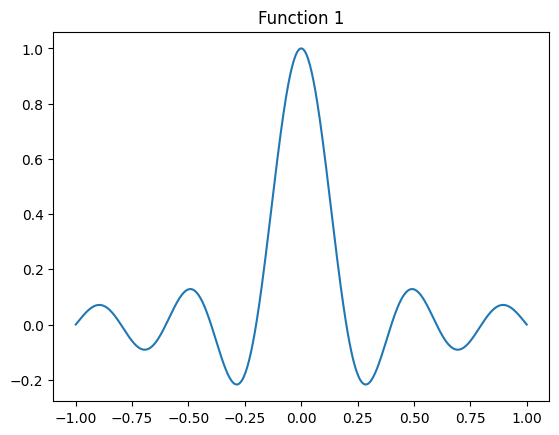

In [7]:
plt.plot(x, y)
plt.title("Function 1")

In [8]:
loss, grad = train(Model3(), x, y)

epoch:1000,loss=0.074767,grad=0.072296
epoch:2000,loss=0.072170,grad=0.050243
epoch:3000,loss=0.069502,grad=0.044927
epoch:4000,loss=0.066627,grad=0.042811
epoch:5000,loss=0.063564,grad=0.041963
epoch:6000,loss=0.060359,grad=0.041666
epoch:7000,loss=0.057074,grad=0.041536
epoch:8000,loss=0.053814,grad=0.041145
epoch:9000,loss=0.050619,grad=0.040444
epoch:10000,loss=0.047515,grad=0.039612
epoch:11000,loss=0.044511,grad=0.038683
epoch:12000,loss=0.041627,grad=0.037598
epoch:13000,loss=0.038863,grad=0.036521
epoch:14000,loss=0.036225,grad=0.035209
epoch:15000,loss=0.033728,grad=0.033794
epoch:16000,loss=0.031374,grad=0.032253
epoch:17000,loss=0.029164,grad=0.030680
epoch:18000,loss=0.027096,grad=0.029136
epoch:19000,loss=0.025162,grad=0.027594
epoch:20000,loss=0.023357,grad=0.026240
epoch:21000,loss=0.021673,grad=0.024901
epoch:22000,loss=0.020101,grad=0.023734
epoch:23000,loss=0.018630,grad=0.022619
epoch:24000,loss=0.017251,grad=0.021391
epoch:25000,loss=0.015956,grad=0.020133
epoch:260

## Result

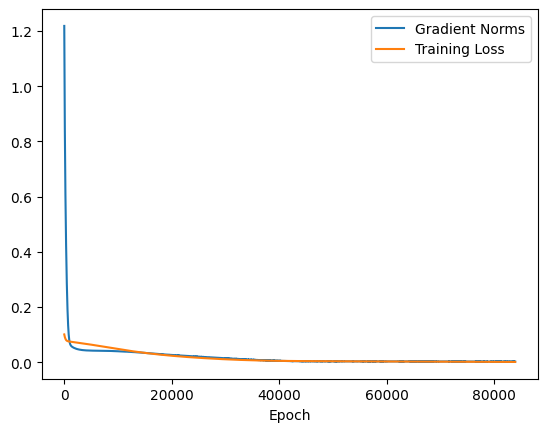

In [9]:
plt.plot(np.arange(1, len(grad) + 1), grad, label="Gradient Norms")
plt.plot(np.arange(1, len(loss) + 1), loss, label="Training Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()